<a href="https://colab.research.google.com/github/savadsvd/NLP/blob/master/chunking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

# Abbreviation	Meaning
# CC	coordinating conjunction
# CD	cardinal digit
# DT	determiner
# EX	existential there
# FW	foreign word
# IN	preposition/subordinating conjunction
# JJ	This NLTK POS Tag is an adjective (large)
# JJR	adjective, comparative (larger)
# JJS	adjective, superlative (largest)
# LS	list market
# MD	modal (could, will)
# NN	noun, singular (cat, tree)
# NNS	noun plural (desks)
# NNP	proper noun, singular (sarah)
# NNPS	proper noun, plural (indians or americans)
# PDT	predeterminer (all, both, half)
# POS	possessive ending (parent\ ‘s)
# PRP	personal pronoun (hers, herself, him, himself)
# PRP$	possessive pronoun (her, his, mine, my, our )
# RB	adverb (occasionally, swiftly)
# RBR	adverb, comparative (greater)
# RBS	adverb, superlative (biggest)
# RP	particle (about)
# TO	infinite marker (to)
# UH	interjection (goodbye)
# VB	verb (ask)
# VBG	verb gerund (judging)
# VBD	verb past tense (pleaded)
# VBN	verb past participle (reunified)
# VBP	verb, present tense not 3rd person singular(wrap)
# VBZ	verb, present tense with 3rd person singular (bases)
# WDT	wh-determiner (that, what)
# WP	wh- pronoun (who)
# WRB	wh- adverb (how)

In [ ]:
sent="the yellow dog barked at the cat"
sent_tokens=nltk.pos_tag(word_tokenize(sent))
sent_tokens

[('the', 'DT'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('cat', 'NN')]

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 6.9 MB/s 


In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

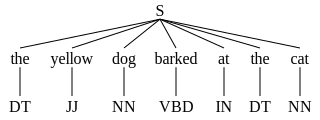

In [ ]:
ne_chunked_sents=nltk.ne_chunk(sent_tokens)  #chunks a single sentence  into a tree
ne_chunked_sents

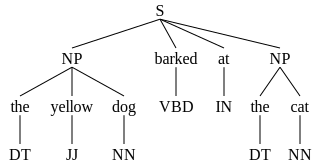

In [ ]:
#? means preceeding pos should come atmost onece.
#* means preceeding pos can be there 0 or more number of times
grammar_np=r"NP:{<DT>?<JJ>*<NN>}"
#create the parser
chunk_parser=nltk.RegexpParser(grammar_np)
chunk_result=chunk_parser.parse(sent_tokens)
chunk_result

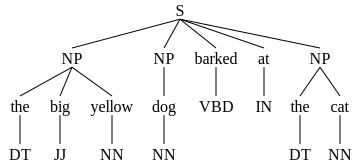

In [ ]:
#2
sent='the big yellow dog barked at the cat'
sent_tokens=nltk.pos_tag(word_tokenize(sent))
grammar_np=r"NP:{<DT>?<JJ>*<NN>}"
chunk_parser=nltk.RegexpParser(grammar_np)
chunk_result=chunk_parser.parse(sent_tokens)
chunk_result

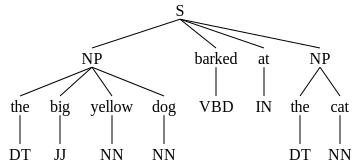

In [ ]:
#3
sent='the big yellow dog barked at the cat'
sent_tokens=nltk.pos_tag(word_tokenize(sent))
grammar_np=r"NP:{<DT>?<JJ>*<NN>+}"
chunk_parser=nltk.RegexpParser(grammar_np)
chunk_result=chunk_parser.parse(sent_tokens)
chunk_result

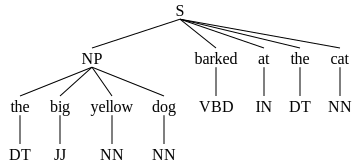

In [ ]:
#4
sent='the big yellow dog barked at the cat'
sent_tokens=nltk.pos_tag(word_tokenize(sent))
grammar_np=r"NP:{<DT>?<JJ>+<NN>+}"
chunk_parser=nltk.RegexpParser(grammar_np)
chunk_result=chunk_parser.parse(sent_tokens)
chunk_result

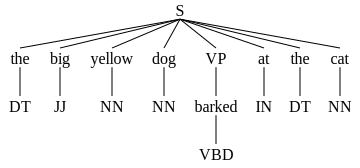

In [ ]:
#5
grammar_vp=r"VP:{<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"
chunk_parser=nltk.RegexpParser(grammar_vp)
chunk_result=chunk_parser.parse(sent_tokens)
chunk_result

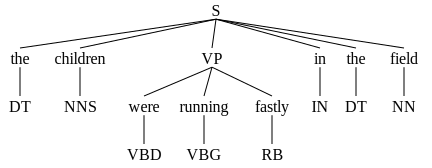

In [ ]:
#6
sent="the children were running fastly in the field"
sent_tokens=nltk.pos_tag(word_tokenize(sent))

grammar_vp=r"VP:{<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"
chunk_parser=nltk.RegexpParser(grammar_vp)
chunk_result=chunk_parser.parse(sent_tokens)
chunk_result

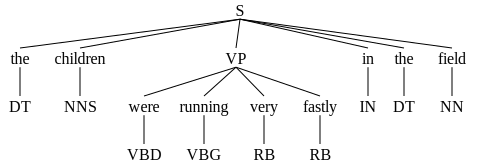

In [ ]:
#7
sent="the children were running very fastly in the field"
sent_tokens=nltk.pos_tag(word_tokenize(sent))

grammar_vp=r"VP:{<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>+}"
chunk_parser=nltk.RegexpParser(grammar_vp)
chunk_result=chunk_parser.parse(sent_tokens)
chunk_result

Named entities recognition(NER)

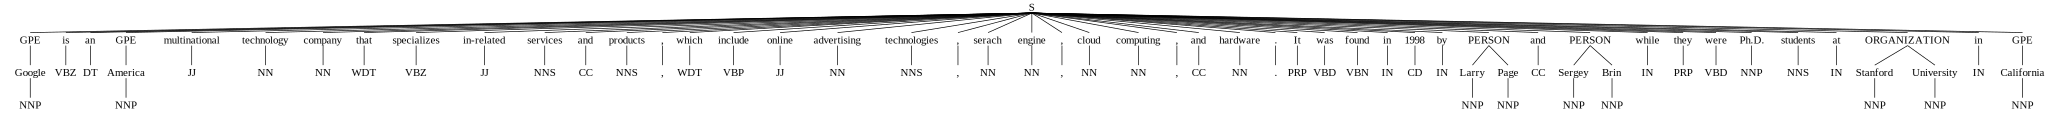

In [ ]:
doc='''
Google is an America multinational technology company that specializes in-related services and 
products, which include online advertising technologies, serach engine, cloud computing, 
and hardware. It was found in 1998 by Larry Page and Sergey Brin while they were Ph.D. students 
at Stanford University in California'''


#tokenize doc
tokenize_doc=nltk.word_tokenize(doc)
tagged_sent=nltk.pos_tag(tokenize_doc)
ne_chunked_sents=nltk.ne_chunk(tagged_sent)
ne_chunked_sents

In [ ]:
#extract all named entities
named_entities=[]
for tagged_tree in ne_chunked_sents:
    if hasattr(tagged_tree,'label'):
        print(tagged_tree.leaves())
        entity_name=' '.join(c[0] for c in tagged_tree.leaves())
        entity_type=tagged_tree.label()
        named_entities.append((entity_name,entity_type))

[('Google', 'NNP')]
[('America', 'NNP')]
[('Larry', 'NNP'), ('Page', 'NNP')]
[('Sergey', 'NNP'), ('Brin', 'NNP')]
[('Stanford', 'NNP'), ('University', 'NNP')]
[('California', 'NNP')]


In [ ]:
named_entities

[('Google', 'GPE'),
 ('America', 'GPE'),
 ('Larry Page', 'PERSON'),
 ('Sergey Brin', 'PERSON'),
 ('Stanford University', 'ORGANIZATION'),
 ('California', 'GPE')]

In [ ]:
#regular expression frunctions
#split()

In [ ]:
import re
text=re.split(r's','this is a demo for a regular expression split')
text

['thi', ' i', ' a demo for a regular expre', '', 'ion ', 'plit']

In [ ]:
text=re.split(r'r','this is a demo for a regular expression split',maxsplit=2)  #maximum split
text

['this is a demo fo', ' a ', 'egular expression split']